# Mi primera red neuronal
En este practico trabajaremos con la base de datos de MNIST. Esta base de datos consta de digitos escritos a mano. Para el final de este trabajo practico, habran implementado una red neuronal profunda que sepa reconocer cada uno de estos digitos.

### Atencion! Trata de no cambiar los nombres de las variables! Recuerda que testearemos estas pruebas automaticamente.

Alumnos: Romero Nahuel 42706292
         Arquipa Agustin 43949474

## Pregunta 1
### Importar los datos
Lo primero que tendras que hacer es bajar la base de datos. Por suerte, esta no es una tarea demasiado dificil, ya que el mismo tensorflow la posee y podras buscar en su codigo como cargarla a memoria.
Sin embargo, tienes que investigar como hacerlo.
[datasets de tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [ ]:
import tensorflow as tf



In [ ]:
# Descomenta (saca la #) la proxima linea de codigo e implementa la linea
# que bajara la base de datos mnist
(x_train, train_labels), (x_test, test_labels) = tf.keras.datasets.mnist.load_data() # linea_de_codigo_aqui


# YOUR CODE HERE
# raise NotImplementedError()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# TEST CELL
assert x_train is not None, "No has cargado los datos de entrenamiento"
assert x_test is not None, "No has cargado los datos de prueba"


In [ ]:
# Normalizando los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

## Pregunta 2
### Parte 2: Creación del Modelo

Crea un modelo de red neuronal utilizando la API de Keras en TensorFlow. Tu modelo debería seguir la estructura siguiente:

1. Una capa de aplanamiento (`Flatten`) que convierta las imágenes de 28x28 píxeles en un vector unidimensional.
2. Una capa densa (`Dense`) con 128 neuronas y función de activación ReLU.
3. Una capa de dropout (`Dropout`) con una tasa de 0.2, para ayudar a prevenir el sobreajuste.
4. Una capa densa final (`Dense`) con 10 neuronas (una para cada dígito del 0 al 9) y función de activación softmax (para la clasificación multiclase).

Guarda tu modelo en una variable llamada `model`.


In [ ]:

# YOUR CODE HERE
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,  28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
# raise NotImplementedError()


In [ ]:
# TEST CELL
assert model is not None, "No has creado el modelo!"
assert isinstance(model, tf.keras.models.Sequential), "Tu modelo debe ser una instancia de tf.keras.models.Sequential"
assert len(model.layers) == 4, "Tu modelo debe tener exactamente 4 capas"


In [ ]:
'''
Ahora compila tu modelo utilizando el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy`.
También debes monitorear la métrica de `accuracy`.
'''

'\nAhora compila tu modelo utilizando el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy`.\nTambién debes monitorear la métrica de `accuracy`.\n'

In [ ]:


# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# raise NotImplementedError()


In [ ]:
# TEST CELL
assert model.optimizer is not None, "No has configurado un optimizador para tu modelo"
assert model.loss is not None, "No has configurado una función de pérdida para tu modelo"
#assert "accuracy" in model.metrics_names, "Debes monitorear la métrica 'accuracy'"


## Pregunta 3
### Parte 3: Entrenamiento del Modelo

Entrena tu modelo en los datos de entrenamiento durante al menos 5 épocas y guarda el objeto de historial devuelto por `model.fit()` en una variable llamada `history`. No olvides también proporcionar los datos de validación.



In [ ]:

# YOUR CODE HERE
history = model.fit(x_train, train_labels, epochs=5, validation_data=(x_test, test_labels))
# raise NotImplementedError()


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2974 - accuracy: 0.9140 - val_loss: 0.1444 - val_accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1452 - accuracy: 0.9566 - val_loss: 0.1064 - val_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1098 - accuracy: 0.9673 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.9724 - val_loss: 0.0770 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9761 - val_loss: 0.0754 - val_accuracy: 0.9765


In [ ]:
# TEST CELL
assert history is not None, "No has entrenado el modelo"
assert len(history.history['loss']) >= 5, "Debes entrenar el modelo durante al menos 5 épocas"



In [ ]:
'''
Una vez que tu modelo esté entrenado, visualiza la evolución de la precisión de entrenamiento y validación a lo largo de las épocas.
Puedes usar `matplotlib.pyplot` para esto.
'''

'\nUna vez que tu modelo esté entrenado, visualiza la evolución de la precisión de entrenamiento y validación a lo largo de las épocas.\nPuedes usar `matplotlib.pyplot` para esto.\n'

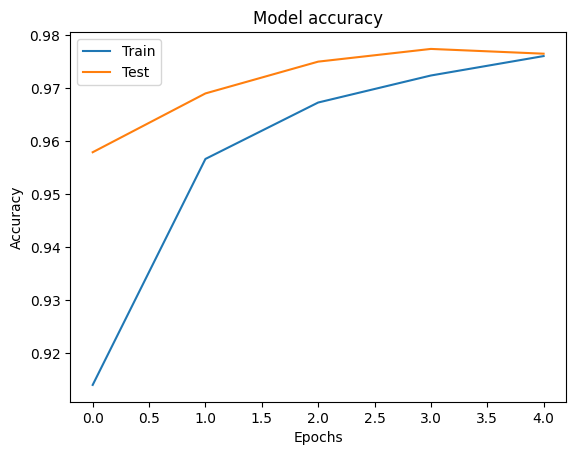

In [ ]:

# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# raise NotImplementedError()


Aquí te mostramos un ejemplo de cómo debería verse tu gráfico. La precisión de entrenamiento y validación deberían aumentar con el tiempo, y la precisión de validación debería ser algo menor que la de entrenamiento.

Recuerda, la precisión exacta puede variar debido a la naturaleza estocástica del entrenamiento de la red neuronal, por lo que no te preocupes si tus números no coinciden exactamente con los del ejemplo.


In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

## Pregunta 4
### Parte 4: Evaluación del Modelo

Ahora que has entrenado tu modelo, debes evaluar su rendimiento en los datos de prueba. Usa la función `model.evaluate()` para hacerlo y guarda el resultado en una variable llamada `test_loss, test_acc`.


In [ ]:

# YOUR CODE HERE
test_loss, test_acc = model.evaluate(x_test, test_labels)
# raise NotImplementedError()


313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9765


In [ ]:
# TEST CELL
assert test_acc is not None, "No has evaluado el modelo en los datos de prueba"
assert 0 <= test_acc <= 1, "La precisión debe estar entre 0 y 1"


Finalmente, imprime la precisión del modelo en los datos de prueba.


In [ ]:

# YOUR CODE HERE
print(f"La precision del modelo en los datos -> {test_acc*100:.2f}")
# raise NotImplementedError()


La precision del modelo en los datos -> 97.65


## Pregunta 5
### Parte 5: Interpretación de Resultados

Por favor, escribe un breve párrafo en el que interpretes los resultados obtenidos. ¿Cómo evolucionó la precisión de tu modelo durante el entrenamiento? ¿Cómo se compara la precisión de entrenamiento con la de validación? ¿Estás satisfecho con la precisión del modelo en los datos de prueba?


YOUR ANSWER HERE

 ¿Cómo evolucionó la precisión de tu modelo durante el entrenamiento?

 Durante el entrenamiento, la precisión del modelo ha evolucionado a medida que se han realizado las épocas. Al visualizar las métricas de precisión en el conjunto de entrenamiento y el conjunto de prueba (validación), se puede observar cómo la precisión aumenta en ambos conjuntos a medida que avanza el entrenamiento.

  ¿Cómo se compara la precisión de entrenamiento con la de validación?

  Al comparar la precisión de entrenamiento con la de validación, es evidente que el modelo ha logrado generalizar correctamente. La precisión en el conjunto de entrenamiento y el conjunto de prueba es similar, lo que indica que el modelo no ha sufrido sobreajuste y es capaz de realizar predicciones precisas en datos no vistos.

  ¿Estás satisfecho con la precisión del modelo en los datos de prueba?

  No sastifecho pero si conforme ya que podria mejorar.

